
# Ex | Resilience {.unnumbered}

Open the latest version on the [*web*](https://wbarfuss.github.io/csm-of-hei/02.03ex-Resilience.html), [*Github*](https://github.com/wbarfuss/csm-of-hei/blob/main/02.03ex-Resilience.ipynb) or in [*GoogleColab*](https://colab.research.google.com/github/wbarfuss/csm-of-hei/blob/main/02.03ex-Resilience.ipynb) 

> The resilience phenomena we discussed are very generic. They don't depend on the exact formulation of the equation. 
These exercises will show that this claim is not entirely wrong.

Tip: Use the `interact` function to get an intuition how to solve the tasks below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5)
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

## Discontinous systems

In this note, we used the classical dynamcial systems from bifurcation theory which are all continuous, meaning that we can write their functional form as one continuous mathematical equation.

The pictorial resilience models often portray a simple cup, such as this, 

In [ ]:
def G(x, a): return np.where(np.abs(x)<a, a/2*x**2, None)

def plot_potential(a=1.0):
    xs=np.linspace(-2,2,301)
    plt.plot(xs, G(xs, a), color='blue')
    plt.ylim(-0.1, 1.1); plt.xlim(-2, 2)
    
interact(plot_potential, a=(0, 2., 0.01),);

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, step=0.01), Output()), _dom_classes=('w…

Let's interpret this *cup* function as a *quasi-potential* for the following difference equation,

$$
x_{t+1} = 
\begin{cases}
    x_{t} - \frac{dG}{dx}(x_{t}) + n\eta_{t} = x_{t} - ax_t + n\eta_{t} & \text{if } -a \leq x \leq a, \\
    -10 & \text{if } x < -a \\
    +10 & \text{if } x > a.
\end{cases}
$$

In [ ]:
def F(x, a, n):
    if x<-a:
        return -10.0
    elif x>a:
        return 10.0
    else:
        return x - a*x + n*np.random.randn()

### Showcase robustness resilience with this system

In [ ]:
# ...

### Showcase adaptation resilience with this system

In [ ]:
# ...

### Showcase the critical slowing with this system

In [ ]:
# ...

## Heavy tailed shocks

So far, we assumed the unpredictable and external shocks are distributed according to a normal distribution with mean zero. 

Real-world shocks may not exhibit this property. They often come with so-called **heavy tails**, meaning that **large** shocks are more probable compared to a normal distribution.

The Student's t-distribution (or simply the t-distribution) is a continuous probability distribution that generalizes the standard normal distribution. Like the latter, it is symmetric around zero and bell-shaped. The t-distribution has one more parameter than the normal distribution, called the *degrees of freedom*, `df`. 

- When `df`$\rightarrow \infty$, the t-distribution becomes the normal distribution.
- When `df`$= 1$, the t-distribution becomes the so-called Cauchy distribution.

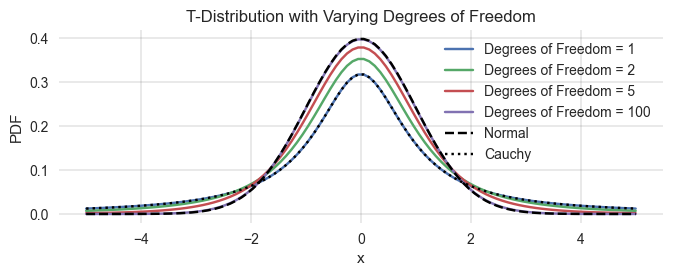

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm, cauchy

x = np.linspace(-5, 5, 100)
degrees_of_freedom = [1, 2, 5, 100]  # Varying degrees of freedom

# Plotting T-distribution curves for different degrees of freedom
for df in degrees_of_freedom:
    y = t.pdf(x, df)  # Using default location and scale parameters (0 and 1)
    plt.plot(x, y, label=f"Degrees of Freedom = {df}")
    
z = norm.pdf(x)
plt.plot(x, z, 'k--', label='Normal')
z = cauchy.pdf(x)
plt.plot(x, z, 'k:', label='Cauchy')

plt.xlabel('x'); plt.ylabel('PDF'); plt.legend();
plt.title('T-Distribution with Varying Degrees of Freedom');

### Investigate the impact of heavy-tailed shocks on resilience.

Tip: Define a difference equation with t-distributed shocks and a degree-of-freedom parameter to control the shocks' heavy-tailedness.

In [ ]:
# ...

### Autocorrelation with heavy-tailed shocks
Investigate how shocks' heavy-tailedness impacts the lag-1 temporal autocorrelation early-warning indicator.

In [ ]:
# ..